In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Fuente y carga de datos

Se utilizará un dataset de delay o retraso de vuelos disponible en: https://www.kaggle.com/datasets/giovamata/airlinedelaycauses

El dataset consta con vuelos del 2008, con toda su información de departure y arrival y si dicho vuelo sufrió de un retraso

Carga de datos

In [3]:
data = pd.read_csv("DelayedFlights.csv") # carga de datos
data.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Hay 1936758 vuelos (una fila por vuelo) y 30 columnas

In [15]:
data.shape

(1936758, 30)

Columnas presentes

In [4]:
data.columns.to_list()

['Unnamed: 0',
 'Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

# Descripción de columnas

## Columnas de temporalidad

Como se puede ver del resumen anterior y del top 5 filas, existen varias columnas asociadas al tiempo del vuelo, tanto del departure (despegue) y arrival (llegada). Acá se identifican:

- Year (int): año del vuelo
- Month (int): mes del vuelo
- DayofMonth (int): día del mes del departure del vuelo
- DayOfWeek (int): día de la semana del vuelo (lunes, martes, ..., domingo)
- DepTime (int): Hora real del departure
- CRSDepTime (int): Hora del departure programada
- ArrvTime (int): Hora real del arrival
- ActualElapsedTime (int): tiempo (en minutos) programado desde el cierre de puerta en el aeropuerto de origen hasta la apertura en el destino
- CRSElapsedTime (int): Idem columna anterior, pero el valor real
- AirTime: tiempo real de vuelo en minutos


Se identifica que las 4 primeras columnas dada su naturaleza son discretas, examinamos su contenido:

In [24]:
def custom_value_count(col: str):
    """
    custom_value_count
    Imprime la cantidad y proporcion por categoría para una columna dada
    """
    print(
    pd.concat((
    data[col].value_counts(ascending=True, sort=True).sort_index(),
    data[col].value_counts(ascending=True, sort=True, normalize = True).sort_index()
    ), axis = 1))


Se puede ver que la totalidad de los vuelos son de 2008

In [30]:
custom_value_count("Year")

        count  proportion
Year                     
2008  1936758         1.0


Cada mes tiene al menos un 5% de participación

In [26]:
custom_value_count("Month")

        count  proportion
Month                    
1      183527    0.094760
2      189534    0.097861
3      200842    0.103700
4      155264    0.080167
5      153072    0.079035
6      200914    0.103737
7      182945    0.094459
8      162648    0.083980
9       95539    0.049329
10     103525    0.053453
11     105563    0.054505
12     203385    0.105013


Las proporciones de los días del mes son más bajas (menores a un 5%), debido a que puede tomar valores entre el 1 y el 31

In [28]:
custom_value_count("DayofMonth")

            count  proportion
DayofMonth                   
1           67815    0.035015
2           63339    0.032704
3           60389    0.031180
4           62682    0.032364
5           60000    0.030980
6           61814    0.031916
7           67478    0.034841
8           62979    0.032518
9           62057    0.032042
10          63385    0.032727
11          63331    0.032699
12          61517    0.031763
13          61278    0.031639
14          64407    0.033255
15          65587    0.033864
16          61152    0.031574
17          63110    0.032585
18          65132    0.033629
19          64470    0.033288
20          65071    0.033598
21          70168    0.036230
22          71649    0.036994
23          63320    0.032694
24          64202    0.033149
25          59056    0.030492
26          62549    0.032296
27          65374    0.033754
28          61093    0.031544
29          56893    0.029375
30          56721    0.029287
31          38740    0.020002


Al igual que el mes, se puede ver que los días de la semana cada uno tiene un porcentaje considerable de participación. Todos los días de la semana tienen más de un 10% de participación

In [29]:
custom_value_count("DayOfWeek")

            count  proportion
DayOfWeek                    
1          290933    0.150216
2          260943    0.134732
3          262805    0.135693
4          289451    0.149451
5          323259    0.166907
6          223256    0.115273
7          286111    0.147727


Las columnas "DepTime", "CRSDepTime" y "ArrTime" que representan una hora, pueden tomar cualquier valor entero entre 0 y 2400 (en vez de un texto del estilo "HH:MM" como "00:00" o "01:30"), lo cual se denomina formato militar de hora. Examinamos su contenido con describe, ya que pueden tomar 2401 valores posibles:

In [32]:
data[["DepTime", "CRSDepTime", "ArrTime"]].describe()

,DepTime,CRSDepTime,ArrTime
count,1.936758e+06,1.936758e+06,1.929648e+06
mean,1.518534e+03,1.467473e+03,1.610141e+03
std,4.504853e+02,4.247668e+02,5.481781e+02
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.203000e+03,1.135000e+03,1.316000e+03
50%,1.545000e+03,1.510000e+03,1.715000e+03
75%,1.900000e+03,1.815000e+03,2.030000e+03
max,2.400000e+03,2.359000e+03,2.400000e+03


Se puede ver que en efecto los máximos rondan 2400 y los mínimos rondan el 0 y las 3 columnas comparten media, desviación estándar y percentiles muy similares, por lo cual barren intervalos horarios muy similares. Si se examinan a nivel de histogramas se corrobora lo descrito anteriormente y que los valores aproximadamente en el rango [0, 1000] tienden a ser minoritarios respecto a valores mayores a 1000, esto de debe a que entre 0 y 1000 incluye todo el horario de madrugada, donde existen menos vuelos

array([[<Axes: title={'center': 'DepTime'}>,
        <Axes: title={'center': 'CRSDepTime'}>],
       [<Axes: title={'center': 'ArrTime'}>, <Axes: >]], dtype=object)

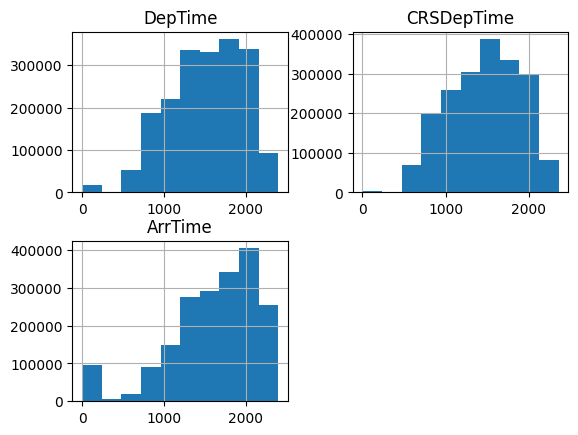

In [33]:
data[["DepTime", "CRSDepTime", "ArrTime"]].hist()